<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/Deep_AI/Course-2/Course_2_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imports

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = os.path.join('/content/sample_data', 'c2w2')
train_dir = os.path.join(data_path, 'training')

os.mkdir(data_path)

--2020-07-28 14:01:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   164MB/s    in 0.4s    

2020-07-28 14:01:31 (164 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:


!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/sample_data/c2w2/cats_and_dogs_filtered.zip

--2020-07-28 14:07:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/sample_data/c2w2/cats_and_dogs_filtered.zip’

/content/sample_dat 100%[===================>]  65.43M   264MB/s    in 0.2s    

2020-07-28 14:07:34 (264 MB/s) - ‘/content/sample_data/c2w2/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



#unpacking data

In [ ]:
local_zip = '/content/sample_data/c2w2/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
#path = os.path.join(data_path, 'ex1')
#os.mkdir(path)

zip_ref.extractall(data_path)
zip_ref.close()

base_dir = os.path.join(data_path, 'cats_and_dogs_filtered')

In [ ]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

#Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(lr = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#Image data generator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

In [ ]:
train_gen = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size = (150, 150),
                                              class_mode = 'binary',
                                              batch_size = 20)
test_gen = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size = (150,150),
                                            class_mode = 'binary',
                                            batch_size = 20)
# 2000 images = batch_size * steps
history = model.fit(train_gen,
                    steps_per_epoch = 100,
                    epochs = 100,
                    validation_data = test_gen,
                    validation_steps = 50,
                    verbose = 2
                    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 26s - loss: 0.4258 - accuracy: 0.8160 - val_loss: 0.5218 - val_accuracy: 0.7610
Epoch 2/100
100/100 - 26s - loss: 0.3832 - accuracy: 0.8245 - val_loss: 0.5739 - val_accuracy: 0.7430
Epoch 3/100
100/100 - 26s - loss: 0.3741 - accuracy: 0.8275 - val_loss: 0.6575 - val_accuracy: 0.7380
Epoch 4/100
100/100 - 26s - loss: 0.3845 - accuracy: 0.8300 - val_loss: 0.4880 - val_accuracy: 0.7790
Epoch 5/100
100/100 - 26s - loss: 0.3848 - accuracy: 0.8310 - val_loss: 0.5135 - val_accuracy: 0.7600
Epoch 6/100
100/100 - 26s - loss: 0.3747 - accuracy: 0.8290 - val_loss: 0.5082 - val_accuracy: 0.7600
Epoch 7/100
100/100 - 26s - loss: 0.3795 - accuracy: 0.8360 - val_loss: 0.4718 - val_accuracy: 0.7770
Epoch 8/100
100/100 - 26s - loss: 0.3819 - accuracy: 0.8320 - val_loss: 0.4704 - val_accuracy: 0.7850
Epoch 9/100
100/100 - 26s - loss: 0.3505 - accuracy: 0.8425 - val_loss: 0.5201 - val_accuracy: 0.767

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    source_files = os.listdir(SOURCE)
    random.shuffle(source_files)
    len_train = int(round(SPLIT_SIZE*len(source_files)))

    train_files = source_files[:len_train]
    test_files = source_files[len_train:]
    
    for file in train_files:
        source_file_path = os.path.join(SOURCE, file)
        train_file_path = os.path.join(TRAINING, file)
        file_size = os.path.getsize(source_file_path)
        copyfile(source_file_path, train_file_path)
        if os.path.getsize(source_file_path)==os.path.getsize(train_file_path):
            pass
        else:
            copyfile(source_file_path, train_file_path)
    for file in test_files:
        source_file_path = os.path.join(SOURCE, file)
        test_file_path = os.path.join(TESTING, file)
        file_size = os.path.getsize(source_file_path)
        copyfile(source_file_path, test_file_path)
        if os.path.getsize(source_file_path)==os.path.getsize(test_file_path):
            pass
        else:
            copyfile(source_file_path, test_file_path)  

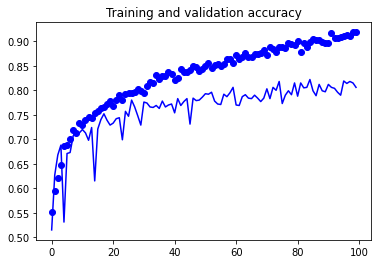

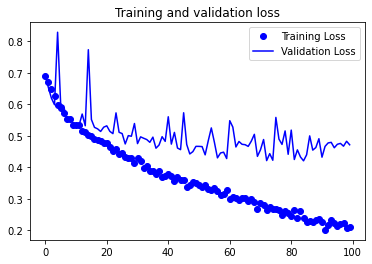

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()